In [1]:
import numpy as np
import MRzeroCore as mr0
import pypulseq as pp
import torch
import matplotlib.pyplot as plt

C:\ProgramData\Miniconda3\envs\mrzero\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


VoxelGridPhantom
size = tensor([0.2000, 0.2000, 0.0080])


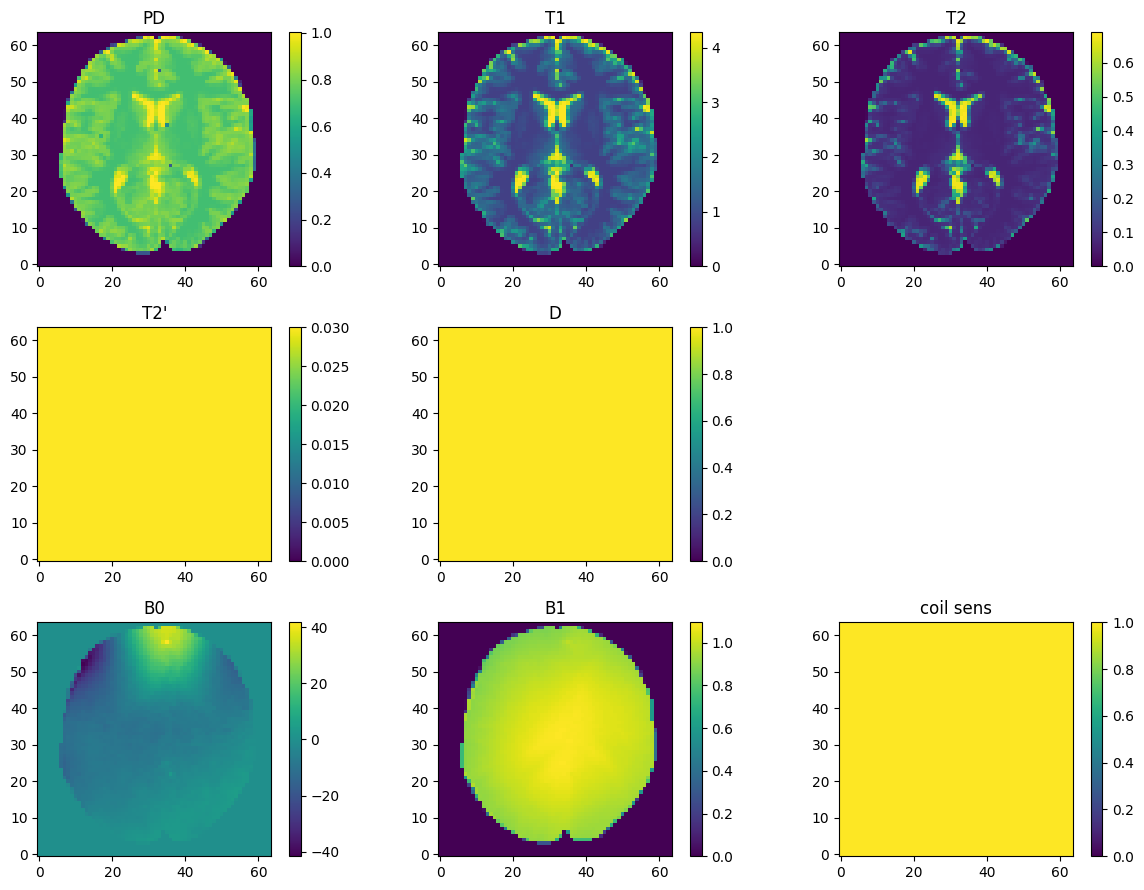

In [47]:
sz = [64, 64]
dB0 = 470 #@param {title:'dB0',type:"slider", min:0, max:500, step:10}
phantom = mr0.VoxelGridPhantom.load_mat(rf'phantom\numerical_brain_cropped.mat')
phantom = phantom.interpolate(sz[0], sz[1], 1)
phantom.plot()
data = phantom.build()

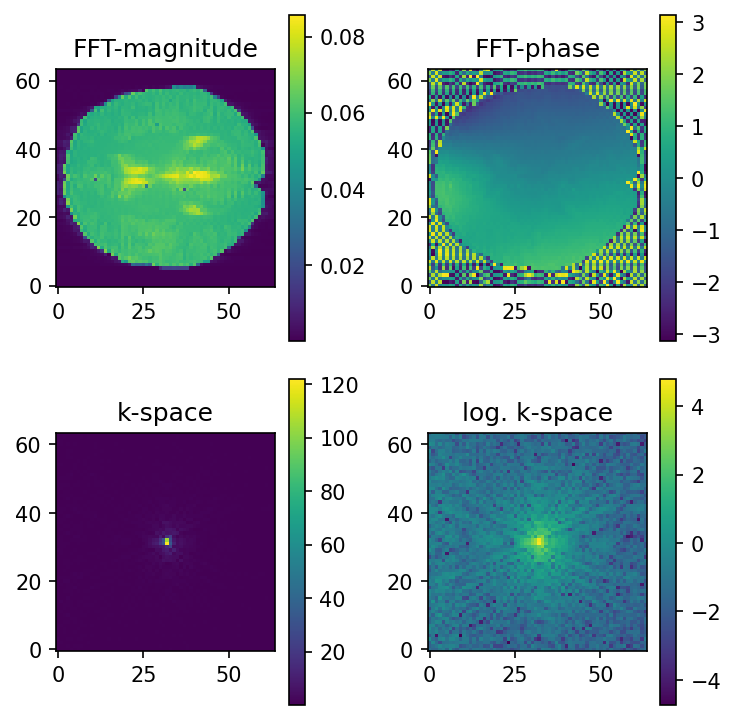

In [49]:
exp_id = rf"ex15_gre_demo_2d_RFspolier"
user_id = "lz"
seq_path = rf"seq\{exp_id}_{user_id}.seq"

# seq_path = rf"gre_1slc_fa10.seq";
seq = pp.Sequence()
seq.read(seq_path)
signal, _ = mr0.util.simulate(seq, phantom)

k_space = signal.reshape(64, 64)
spectrum = torch.fft.ifftshift(k_space)
space = torch.fft.ifft2(spectrum)
space = torch.fft.fftshift(space)

fig = plt.figure(figsize=(5, 5), dpi=150)  # fig.clf()

plt.subplot(221)
plt.title('FFT-magnitude')
mr0.util.imshow(np.abs(space.numpy()))
plt.colorbar()

plt.subplot(222)
plt.title('FFT-phase')
mr0.util.imshow(np.angle(space.numpy()), vmin=-np.pi, vmax=np.pi)
plt.colorbar()

plt.subplot(223)
plt.title('k-space')
mr0.util.imshow(np.abs(k_space.numpy()))
plt.colorbar()

plt.subplot(224)
plt.title('log. k-space')
mr0.util.imshow(np.log(np.abs(k_space.numpy())))
plt.colorbar()

plt.tight_layout()